In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/Colab Notebooks/

/content/drive/MyDrive/Colab Notebooks


**ila√ß sƒ±nƒ±flandƒ±rmasƒ± veri seti**

bir tƒ±p ara≈ütƒ±rmacƒ±sƒ± olarak bir √ßalƒ±≈üma i√ßin elimizde  ƒ∞la√ß A, ƒ∞la√ß B, ƒ∞la√ß c, ƒ∞la√ß x ve y var. 200 tane de aynƒ± hastalƒ±ƒüa sahip bireyler bulunmaktadƒ±r . ve bu hastalar hakkƒ±nda belirli verilere sahibiz. 

yapmamƒ±z gereken gelecekte aynƒ± hastalƒ±ƒüa sahip bir hasta i√ßin hangi ilacƒ±n daha uygun olabileceƒüini bulmak i√ßin bir analiz modeli geli≈ütirmeliyiz. Veri k√ºmemizde hastalarƒ±n Ya≈ü, Cinsiyet, Kan Basƒ±ncƒ± ve Kolesterol deƒüerleri bulunmaktadƒ±r 

 Bu, √ßok sƒ±nƒ±flƒ± sƒ±nƒ±flandƒ±rƒ±cƒ±nƒ±n bir √∂rneƒüidir ve veri k√ºmesinin eƒüitim b√∂l√ºm√ºn√º bir karar aƒüacƒ± olu≈üturmak i√ßin kullanabilir ve ardƒ±ndan bunu bilinmeyen bir hastanƒ±n sƒ±nƒ±fƒ±nƒ± tahmin etmek veya yeni bir hastaya ila√ß re√ßete etmek i√ßin kullanabiliriz.

 
kaggle linki:https://www.kaggle.com/datasets/prathamtripathi/drug-classification

In [ ]:
%matplotlib inline  
#Matplotlib Inline komutu, matplotlib tarafƒ±ndan olu≈üturulan √ßizimlerin ayrƒ± bir √ßƒ±ktƒ± 
#penceresinde deƒüil, √ßalƒ±≈ütƒ±rdƒ±ƒüƒ±mƒ±z IPython kabuƒüunda g√∂sterilmesini saƒülayan komuttur.
import numpy as np
#NumPy (Numerical Python), √ßok boyutlu dizilerle ve matrislerle √ßalƒ±≈ümamƒ±zƒ± saƒülayan 
#ve matematiksel i≈ülemler yapabileceƒüimiz Python dili k√ºt√ºphanelerindendir.
import pandas as pd   
#veri setinin okuma, veri √∂n i≈üleme ve veri temizleme 
import matplotlib.pyplot as plt
#Matplotlib, bir g√∂rselle≈ütirme yardƒ±mcƒ± programƒ± olarak hizmet veren, 
#python'da  bir grafik √ßizim kitaplƒ±ƒüƒ±dƒ±r.
import seaborn as sns
#Seaborn, Python'da istatistiksel grafikler olu≈üturmak i√ßin bir k√ºt√ºphanedir.  Matplotlib √ºzerine kuruludur
#pandas veri yapƒ±larƒ±yla yakƒ±ndan b√ºt√ºnle≈üir.  
#Seaborn, verilerinizi g√∂rselle≈ütirilmesine ve anlamanƒ±za yardƒ±mcƒ± olur


from sklearn.model_selection import train_test_split# veriler eƒüitim ve test verisi olarak ayrƒ±mamƒ±za yarar
from sklearn.metrics  import classification_report# verileri sƒ±nƒ±flandƒ±rmamƒ±za yarar 
from sklearn.linear_model import LinearRegression# lineer regresyon modeli import edildi
from sklearn.metrics import accuracy_score # doƒüruluk skoru 
from sklearn.metrics import confusion_matrix# konf√ºzyon matrisine bakƒ±lacak 


#Scikit-learn, veri analiz ara√ßlarƒ±yla birlikte bir√ßok danƒ±≈ümansƒ±z ve danƒ±≈ümanlƒ± √∂ƒürenme algoritmasƒ± saƒülayan Python k√ºt√ºphanesidir

In [ ]:
# veri setimizi pandas ile okuduk 
df =  pd.read_csv('/content/drive/MyDrive/Colab Notebooks/drug200.csv')

**veri setinin tanƒ±nmasƒ±**

In [ ]:
df.shape # verimizin ka√ß nitelik ve √∂znitelikten olustuƒüunu g√∂zlemledi (200 satƒ±r ve 6 s√ºtundan olu≈üuyor )

(200, 6)


*   Age : √∂rneklemde bulunan ki≈üilerin ya≈ülarƒ±nƒ± belirtir
*   sex/gender : ki≈üilerin cinsiyet deƒüerlerini tanƒ±mlar
*   BP (Blood Pressure Levels ): Kan basƒ±ncƒ± d√ºzeyini g√∂sterir 
*   Cholesterol : kolesterol deƒüerini g√∂sterir 
*   Na_to_K : ki≈üinin sodyum ve potasyum deƒüerini g√∂sterir
*   drug : ila√ß anlamƒ±nda kullanƒ±lmaktadƒ±r 


In [ ]:
df.head() # veri setinin ilk 5 satƒ±rƒ±nƒ± g√∂sterir 

Age Sex      BP Cholesterol  Na_to_K   Drug
0   23   F    HIGH        HIGH   25.355  DrugY
1   47   M     LOW        HIGH   13.093  drugC
2   47   M     LOW        HIGH   10.114  drugC
3   28   F  NORMAL        HIGH    7.798  drugX
4   61   F     LOW        HIGH   18.043  DrugY

In [ ]:
df.columns # veri setinin s√ºtun isimlerini g√∂sterir 

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')

In [ ]:
# veri setinde bir s√ºtun ismi deƒüi≈ütiriyoruz  
df.rename({"Sex": "gender"}, axis="columns", inplace=True)
df.head()

Age gender      BP Cholesterol  Na_to_K   Drug
0   23      F    HIGH        HIGH   25.355  DrugY
1   47      M     LOW        HIGH   13.093  drugC
2   47      M     LOW        HIGH   10.114  drugC
3   28      F  NORMAL        HIGH    7.798  drugX
4   61      F     LOW        HIGH   18.043  DrugY

In [ ]:
from sklearn.preprocessing import LabelEncoder #kategorik deƒüi≈ükenlerin tahminde
#kullanƒ±labilmesi i√ßin verinin t√ºr√ºn√º deƒüi≈ütirmeye yarar
        
le = LabelEncoder()

#a≈üaƒüƒ±da 3 s√ºtunun deƒüerlerini int t√ºr√ºne d√∂n√º≈üt√ºrd√ºk
df['gender'] = le.fit_transform(df['gender'])
df['BP'] = le.fit_transform(df['BP'])
df['Cholesterol'] = le.fit_transform(df['Cholesterol'])

#df["gender"] = df["gender"].replace("F",0) diyerek de sayƒ±salla≈ütƒ±rma yapabiliriz


In [ ]:
df.head() # kontrol i√ßin ilk 5 satƒ±rƒ± √ßaƒüƒ±rdƒ±k 

Age  gender  BP  Cholesterol  Na_to_K   Drug
0   23       0   0            0   25.355  DrugY
1   47       1   1            0   13.093  drugC
2   47       1   1            0   10.114  drugC
3   28       0   2            0    7.798  drugX
4   61       0   1            0   18.043  DrugY

In [ ]:
# tahmin i√ßin kullanacaƒüƒ±mƒ±z s√ºtunun benzersiz deƒüerlerine ula≈ütƒ±k 
print(pd.unique(df['Drug']))

['DrugY' 'drugC' 'drugX' 'drugA' 'drugB']


In [ ]:
df.nunique() # b√ºt√ºn s√ºtunlarƒ±n benzersiz deƒüerlerini aldƒ±k

Age             57
gender           2
BP               3
Cholesterol      2
Na_to_K        198
Drug             5
dtype: int64

In [ ]:
df.info() 
#Toplamda 0'dan 199'a 200 satƒ±rlƒ±k verimiz var.
# 6 s√ºtun var.
# Null deƒüer yok, yani her satƒ±rda veri mevcut
# Verilerin t√ºrleri yazƒ±yor.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   gender       200 non-null    int64  
 2   BP           200 non-null    int64  
 3   Cholesterol  200 non-null    int64  
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(4), object(1)
memory usage: 9.5+ KB


In [ ]:
df.describe() # verilerimizin tanƒ±mlayƒ±cƒ± istatistiƒüine bakƒ±yoruz 

Age      gender          BP  Cholesterol     Na_to_K
count  200.000000  200.000000  200.000000   200.000000  200.000000
mean    44.315000    0.520000    0.910000     0.485000   16.084485
std     16.544315    0.500854    0.821752     0.501029    7.223956
min     15.000000    0.000000    0.000000     0.000000    6.269000
25%     31.000000    0.000000    0.000000     0.000000   10.445500
50%     45.000000    1.000000    1.000000     0.000000   13.936500
75%     58.000000    1.000000    2.000000     1.000000   19.380000
max     74.000000    1.000000    2.000000     1.000000   38.247000

***veri setinin hazƒ±rlanmasƒ±***

In [ ]:
# veri setinde bir s√ºtun ismi deƒüi≈ütiriyoruz  
df.rename({"Sex": "gender"}, axis="columns", inplace=True)
df.head()

Age  gender  BP  Cholesterol  Na_to_K   Drug
0   23       0   0            0   25.355  DrugY
1   47       1   1            0   13.093  drugC
2   47       1   1            0   10.114  drugC
3   28       0   2            0    7.798  drugX
4   61       0   1            0   18.043  DrugY

In [ ]:
df.isna().sum() # burada ise hangi deƒüi≈ükenimizde ka√ß adert eksik deƒüer olduƒüunu g√∂sterdik

Age            0
gender         0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [ ]:
df['Drug'].value_counts()
# burada Drug deƒüi≈ükenimizin dengeli daƒüƒ±lƒ±p daƒüƒ±lmadƒ±ƒüƒ±nƒ± kontrol ettik

DrugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: Drug, dtype: int64

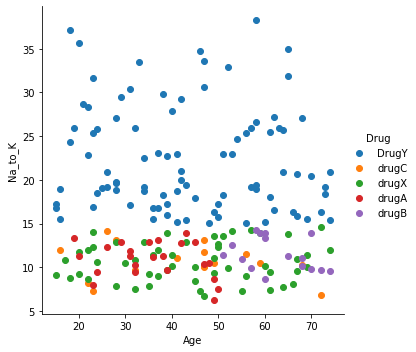

In [ ]:
sns.FacetGrid(df,hue='Drug',height=5)\ 
.map(plt.scatter,'Age','Na_to_K')\
.add_legend()

# bu veri g√∂rselle≈ütirmesinde drug s√ºtunun ya≈ü ve potasyum ve sodyum deƒüerleri ile ili≈ükisi incelenmi≈ütir 
# kullanƒ±lan grafik seaborn k√ºt√ºphanesinin sa√ßƒ±lƒ±m grafiƒüidir 
# benzersiz ila√ß deƒüerlerinin ya≈ü ve potasyum ve sodyum deƒüerleri altƒ±nda daƒüƒ±lƒ±mƒ± renklendirilerek g√∂sterilmi≈ütir 

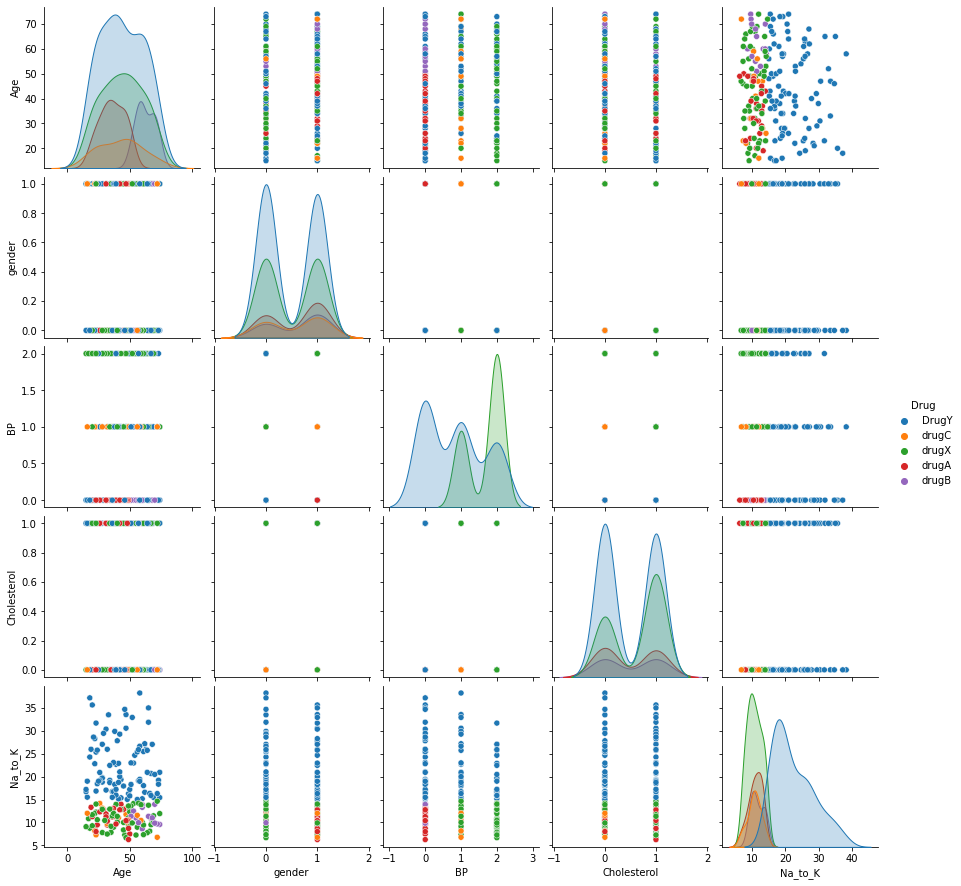

In [ ]:
#veri seti i√ßindeki t√ºm deƒüi≈ükenlerin birbirleri ile olan ili≈ükilerini g√∂steren grafikler verir
sns.pairplot(df,hue='Drug')

yukarƒ±da baƒüƒ±msƒ±z deƒüi≈ükenlerimiz olan sodyum_poatasyum oranƒ± ve ya≈ü deƒüi≈ükenlerini i√ßeren grafikler g√∂r√ºnmektedir bu grafiklere g√∂re 
1. ila√ß A,B,X,C ila√ßlarƒ± genel anlamda potasyum deƒüerleri d√º≈ü√ºk(5-15) olan hastalar √ºzerinde kullanƒ±lmaktadƒ±r 
2. y ilacƒ± ise potasyum deƒüeri 15-35 aralƒ±ƒüƒ±nda olan hastalarƒ±n tedavisinde kullanƒ±lmaktadƒ±r
3. √ßok fazla grafiƒüin olmamasƒ±nƒ±n sebebi n√ºmerik deƒüerlerin az olmasƒ± sebebiyledir 

In [ ]:
X = df.iloc[:, :-1].values    # x deƒüerine ilk 5 s√ºtun deƒüerini atadƒ±k
y = df.iloc[:, -1].values    # y deƒüi≈ükenine son s√ºtun deƒüerini atadƒ±k 
print(X)             #  print diyerek atadƒ±ƒüƒ±mƒ±z deƒüerleri yazdƒ±rdƒ±k 
print(y)
X.shape   # atadƒ±ƒüƒ±mƒ±z deƒüerlerin boyutlarƒ±nƒ± √∂ƒürendik 
y.shape

#elimizde olan x verileri ile mevcut modelimizi eƒüiteceƒüiz 
#elimizde olan y verisi ile de modelimizi tahmin i√ßin kullanacaƒüƒ±z 

[[23.     0.     0.     0.    25.355]
 [47.     1.     1.     0.    13.093]
 [47.     1.     1.     0.    10.114]
 [28.     0.     2.     0.     7.798]
 [61.     0.     1.     0.    18.043]
 [22.     0.     2.     0.     8.607]
 [49.     0.     2.     0.    16.275]
 [41.     1.     1.     0.    11.037]
 [60.     1.     2.     0.    15.171]
 [43.     1.     1.     1.    19.368]
 [47.     0.     1.     0.    11.767]
 [34.     0.     0.     1.    19.199]
 [43.     1.     1.     0.    15.376]
 [74.     0.     1.     0.    20.942]
 [50.     0.     2.     0.    12.703]
 [16.     0.     0.     1.    15.516]
 [69.     1.     1.     1.    11.455]
 [43.     1.     0.     0.    13.972]
 [23.     1.     1.     0.     7.298]
 [32.     0.     0.     1.    25.974]
 [57.     1.     1.     1.    19.128]
 [63.     1.     2.     0.    25.917]
 [47.     1.     1.     1.    30.568]
 [48.     0.     1.     0.    15.036]
 [33.     0.     1.     0.    33.486]
 [28.     0.     0.     1.    18.809]
 [31.     1.

(200,)

In [ ]:
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.4,random_state=0) 
#veri setimizi %30 test olmak √ºzere test ve eƒüitim verisi olarak ayƒ±rdƒ±k 
 # random_state tekrar √ºretilebilirlik i√ßin √ßalƒ±≈ütƒ±rmalar arasƒ±nda tutarlƒ± olmalƒ±dƒ±r

In [ ]:
#eƒüitim ve test verisi olarak ayƒ±rmƒ±≈ü olduƒüumuz verilerin boyutlarƒ±nƒ± √∂ƒürendik 
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(120, 5)
(80, 5)
(120,)
(80,)


**modellerin kullanƒ±lmasƒ±**

**lineer regresyon**


Linear Regression: Sayƒ±sal girdi ve √ßƒ±ktƒ±lar arasƒ±ndaki doƒürusal ili≈ükiyi tespit etmeyi saƒülar. D√ºzlemde yayƒ±lmƒ±≈ü verinin modelini en iyi bi√ßimde doƒürusal olarak √ßƒ±kartmaya √ßalƒ±≈üan y√∂ntemdir



*   S√ºrekli deƒüi≈üken(ler)e dayalƒ± olarak ger√ßek deƒüerlerin (konut maliyeti, arama sayƒ±sƒ±, toplam satƒ±≈ülar vb.) tahmin edilmesinde kullanƒ±lƒ±r. Burada, baƒüƒ±msƒ±z ve baƒüƒ±mlƒ± deƒüi≈ükenler arasƒ±nda en iyi √ßizgiyi uydurarak ili≈üki kurulmaktadƒ±r. Bu en uygun √ßizgi, regresyon √ßizgisi olarak bilinir ve bir doƒürusal denklem Y= a X + b ile temsil edilir.



In [ ]:
XL = df.iloc[:, :-1].values    #   X -> Feature Variables\n",
yL = df.iloc[:, -1].values #   y ->  Target\n",
        
from sklearn.preprocessing import LabelEncoder # kategorik verilerin sayƒ±salla≈ütƒ±rmamƒ±za yarayan k√ºt√ºphane import edildi 
        
le = LabelEncoder() #encoder mod√ºl√º √ßaƒürƒ±ldƒ± 
YL = le.fit_transform(yL) # d√∂n√º≈üt√ºr√ºlen veriler YL adlƒ± deƒüi≈ükene atandƒ± 
        
print(y)  # kategorik veri
print(YL) # sayƒ±sal veri

['DrugY' 'drugC' 'drugC' 'drugX' 'DrugY' 'drugX' 'DrugY' 'drugC' 'DrugY'
 'DrugY' 'drugC' 'DrugY' 'DrugY' 'DrugY' 'drugX' 'DrugY' 'drugX' 'drugA'
 'drugC' 'DrugY' 'DrugY' 'DrugY' 'DrugY' 'DrugY' 'DrugY' 'DrugY' 'DrugY'
 'drugX' 'DrugY' 'DrugY' 'drugX' 'drugB' 'drugX' 'DrugY' 'drugX' 'drugX'
 'drugA' 'drugX' 'drugX' 'drugX' 'DrugY' 'drugB' 'DrugY' 'drugX' 'drugX'
 'drugX' 'drugA' 'drugC' 'DrugY' 'DrugY' 'DrugY' 'drugX' 'DrugY' 'DrugY'
 'drugB' 'drugC' 'drugB' 'DrugY' 'drugX' 'DrugY' 'DrugY' 'drugA' 'DrugY'
 'drugX' 'drugB' 'DrugY' 'drugA' 'drugX' 'DrugY' 'DrugY' 'drugB' 'DrugY'
 'drugX' 'DrugY' 'DrugY' 'DrugY' 'drugA' 'DrugY' 'drugA' 'drugX' 'drugB'
 'drugX' 'drugC' 'drugA' 'drugC' 'drugB' 'drugX' 'DrugY' 'DrugY' 'DrugY'
 'DrugY' 'DrugY' 'DrugY' 'DrugY' 'DrugY' 'drugX' 'DrugY' 'DrugY' 'DrugY'
 'DrugY' 'drugA' 'drugA' 'drugC' 'drugX' 'DrugY' 'drugX' 'drugX' 'DrugY'
 'drugB' 'DrugY' 'drugA' 'drugX' 'drugX' 'drugX' 'drugX' 'DrugY' 'drugX'
 'drugX' 'drugA' 'DrugY' 'DrugY' 'DrugY' 'DrugY' 'D

In [ ]:
X_trainL, X_testL, y_trainL, y_testL = train_test_split(XL, YL, test_size = 0.1, random_state =0) 

In [ ]:
print(X_trainL.shape)
print(y_trainL.shape)

(180, 5)
(180,)


In [ ]:
from sklearn.linear_model import LinearRegression
        
        # √ñrnek Model
modelLR = LinearRegression()
        
        # Modeli eƒüitim verilerine uydurma
modelLR.fit(X_trainL, y_trainL)
        
        # Test verisinde tahmin 
Y_pred = modelLR.predict(X_testL)

In [ ]:
df_preds = pd.DataFrame({'Actual': y_testL, 'Predicted': Y_pred})
print(df_preds)

    Actual  Predicted
0        3   2.789988
1        4   2.796142
2        0   0.831762
3        0  -2.043363
4        0   1.702389
5        4   2.529789
6        4   3.454250
7        4   2.488314
8        0   1.549649
9        4   3.810959
10       1   2.006498
11       0  -0.404118
12       0   0.084808
13       0   1.614746
14       2   1.057145
15       3   2.220014
16       0  -1.296284
17       0   1.638605
18       4   2.046728
19       0   0.834898


In [ ]:
df.head()

Age  gender  BP  Cholesterol  Na_to_K   Drug
0   23       0   0            0   25.355  DrugY
1   47       1   1            0   13.093  drugC
2   47       1   1            0   10.114  drugC
3   28       0   2            0    7.798  drugX
4   61       0   1            0   18.043  DrugY

In [ ]:
from sklearn import metrics
        #ùë•‚ÇÅ ve ùë•‚ÇÇ olmak √ºzere iki baƒüƒ±msƒ±z deƒüi≈üken varsa, regresyon fonksiyonu ùëì(ùë•‚ÇÅ, ùë•‚ÇÇ) = ùëè‚ÇÄ + ùëè‚ÇÅùë•‚ÇÅ + ùëè‚ÇÇùë•‚ÇÇ.\n",
        #ùëì(ùë•‚ÇÅ, ùë•‚ÇÇ) = ùëè‚ÇÄ + b1x1 + b2x2 + b3x3 + b4x4 + b5x5 
        #5 tane temel baƒüƒ±msƒ±z deƒüi≈ükenden olu≈ümaktadƒ±r bunlar (age,gender,cholesterol,Na_to_k,BP)
print('y-intercept             :' , modelLR.intercept_) #b0\n",
print('beta coefficients       :' , modelLR.coef_) #b1, b2,...\n",
print('Mean Abs Error MAE      :' ,metrics.mean_absolute_error(y_testL,Y_pred))
print('Mean Sqrt Error MSE     :' ,metrics.mean_squared_error(y_testL,Y_pred))
print('Root Mean Sqrt Error RMSE:' ,np.sqrt(metrics.mean_squared_error(y_testL,Y_pred)))




y-intercept             : 3.328216938528489
beta coefficients       : [ 4.72538417e-04 -1.43620808e-01  7.23636156e-01  2.76488619e-01
 -1.54715301e-01]
Mean Abs Error MAE      : 1.090689515804878
Mean Sqrt Error MSE     : 1.5303190339324015
Root Mean Sqrt Error RMSE: 1.2370606427869255


doƒürusal regresyonun amacƒ± ,t√ºm veri noktalarƒ±nƒ±n tahmin hatasƒ±nƒ± en aza indiren bir √ßizgi bulmaktƒ±r 
* regresyon analizinde modelin performansƒ±nƒ± deƒüerlendirmek i√ßin 
1. ortalama karesel hata 
2.  ortalama mutlak hata 
3. k√∂k ortalama karesel hata 


belirleme katsayƒ±sƒ± metrikleri kullanƒ±lƒ±r

**MAE (Means absolute error) ortalama mutlak hata**


veri k√ºmesindeki ger√ßek ve tahmin edilen mutlak farkƒ±n ortalamasƒ±nƒ± temsil eder. veri setindeki artƒ±klarƒ±n ortalamasƒ±nƒ± √∂l√ßer


**MSE (Mean squared Error) ortalama karesel hata**

veri setindeki orjinal ve tahmin edilen deƒüerler arasƒ±ndaki farkƒ±n karesinin ortalamasƒ±nƒ± temsil eder kalƒ±ntƒ±larƒ±n varyansƒ±nƒ± √∂l√ßer

**RMSE (Root mean Squared Error) k√∂k ortalama kare hatasƒ±**

ortalama kare hatasƒ±nƒ±n karek√∂k√ºd√ºr. kalƒ±ntƒ±larƒ±n standart sapmasƒ±nƒ± √∂l√ßer




 **60-40**
1. y-intercept             : 3.3436928946569626
2. beta coefficients       : [ 0.00246981 -0.0510324   0.82657897  0.2402869  -0.17043411]
3. Mean Abs Error MAE      : 1.0690283910531497
4. Mean Sqrt Error MSE     : 1.6540644404165579
5. Root Mean Sqrt Error RMSE: 1.2861043660669838

**70-30**

1. y-intercept             : 3.150162387182345
2. beta coefficients       : [ 0.00562831 -0.22593053  0.80032138  0.26717183 -0.15812123]
3. Mean Abs Error MAE      : 1.0521109443361558
4. Mean Sqrt Error MSE     : 1.5808576488591857
5. Root Mean Sqrt Error RMSE: 1.2573216171128156

**80-20**

1. y-intercept             : 3.278140061854006
2. beta coefficients       : [ 0.00212077 -0.22286634  0.72925156  0.23848894 -0.15160124]
3. Mean Abs Error MAE      : 1.0503518344662983
4. Mean Sqrt Error MSE     : 1.489931280286363
5. Root Mean Sqrt Error RMSE: 1.2206274125573138

**90-10**

1. y-intercept             : 3.328216938528489
2. beta coefficients       : [ 4.72538417e-04 -1.43620808e-01  7.23636156e-01  2.76488619e-01
 -1.54715301e-01]
3. Mean Abs Error MAE      : 1.090689515804878
4. Mean Sqrt Error MSE     : 1.5303190339324015
5. Root Mean Sqrt Error RMSE: 1.2370606427869255

-------------------------------------------------------------------------------------------------------------

**3.2 K-En Yakƒ±n Kom≈üuluk (K-NN)**

K en yakƒ±n kom≈üuluk y√∂ntemi, test √∂rneklerini k kom≈üusunun √ßoƒüunluk oyu ile sƒ±nƒ±flandƒ±ran basit bir algoritmadƒ±r.

**K parametresinin se√ßimi:** Az sayƒ±da kom≈üu olmasƒ± durumunda, g√ºr√ºlt√ºn√ºn sonu√ß √ºzerinde daha b√ºy√ºk bir etkisi olacaktƒ±r ve √ßok sayƒ±da kom≈üu, onu hesaplama a√ßƒ±sƒ±ndan pahalƒ± hale getirir.

Genel olarak, Veri bilimcileri sƒ±nƒ±f sayƒ±sƒ± √ßift ise tek sayƒ± olarak se√ßerler. Modeli farklƒ± k deƒüerleri √ºzerinde olu≈üturarak da kontrol edebilir ve performanslarƒ±nƒ± kontrol edebilirsiniz.




*   5 i√ßin doƒüruluk deƒüeri : 0,65
*   7 i√ßin doƒüruluk deƒüeri : 0,65
*   9 i√ßin doƒüruluk deƒüeri : 0,68





In [ ]:
from sklearn.neighbors import KNeighborsClassifier
Model = KNeighborsClassifier(n_neighbors=3)
Model.fit(X_train, y_train)
y_pred = Model.predict(X_test)

#kullanmƒ±≈ü olduƒüumuz modelin kalitesini √∂lmek i√ßin kullandƒ±ƒüƒ±mƒ±z √∂l√ß√ºm metrikleri 
print(classification_report(y_test, y_pred))#kullanmƒ±≈ü olduƒüumuz modelin kalitesini √∂lmek i√ßin kullandƒ±ƒüƒ±mƒ±z √∂l√ß√ºm metrikleri 
print(confusion_matrix(y_test, y_pred))  # confusion matrix deƒüeri verir (√∂rnek: 39 drug y den 2 tanesi false olmu≈ü )
print('doƒüruluk',accuracy_score(y_pred,y_test))#Doƒüru tahminlerin y√ºzdesi 



              precision    recall  f1-score   support

       DrugY       0.93      0.95      0.94        39
       drugA       0.46      0.75      0.57         8
       drugB       0.36      1.00      0.53         4
       drugC       0.00      0.00      0.00         4
       drugX       0.71      0.40      0.51        25

    accuracy                           0.71        80
   macro avg       0.49      0.62      0.51        80
weighted avg       0.74      0.71      0.70        80

[[37  0  2  0  0]
 [ 0  6  0  1  1]
 [ 0  0  4  0  0]
 [ 0  1  0  0  3]
 [ 3  6  5  1 10]]
doƒüruluk 0.7125


1. **precision**
2. **recall**
3. **f1-score** 
*  tanƒ±mlarƒ± a≈üaƒüƒ±da a√ßƒ±klanmƒ±≈ütƒ±r 






In [ ]:
#Kesinlik ‚Äì Tahminlerinizin y√ºzde ka√ßƒ± doƒüru √ßƒ±ktƒ±?

#Kesinlik, bir sƒ±nƒ±flandƒ±rƒ±cƒ±nƒ±n, aslƒ±nda negatif olan bir √∂rneƒüi pozitif olarak etiketlememe yeteneƒüidir. 
#Her sƒ±nƒ±f i√ßin, ger√ßek pozitiflerin doƒüru ve yanlƒ±≈ü pozitiflerin toplamƒ±na oranƒ± olarak tanƒ±mlanƒ±r.

#TP ‚Äì Ger√ßek Pozitifler 
#FP ‚Äì Yanlƒ±≈ü Pozitifler 

 #Kesinlik ‚Äì Pozitif tahminlerin doƒüruluƒüu. 
  #Kesinlik = TP/(TP + FP) 
from sklearn.metrics import precision_score

print("Precision score: {}".format(precision_score(y_test,y_pred,average=None)))

Precision score: [0.925      0.46153846 0.36363636 0.         0.71428571]


In [ ]:
#Toplam ger√ßek pozitiflere g√∂re pozitif tahminleri d√ºzeltin

#Bu ≈üu ≈üekilde hesaplanƒ±r:

 #   Hatƒ±rlama = Ger√ßek Pozitifler / (Ger√ßek Pozitifler + Yanlƒ±≈ü Negatifler)

#olu≈üturabiliriz Kesinliƒüi g√∂rselle≈ütirmek ve belirli bir modeli geri √ßaƒüƒ±rmak i√ßin bir kesinlik-geri √ßaƒüƒ±rma eƒürisi .
# Bu eƒüri, farklƒ± e≈üikler i√ßin kesinlik ve geri √ßaƒüƒ±rma arasƒ±ndaki deƒüi≈ü toku≈üu g√∂sterir. 
from sklearn.metrics import recall_score

print("Recall score: {}".format(recall_score(y_test,y_pred,average=None)))

Recall score: [0.94871795 0.75       1.         0.         0.4       ]


In [ ]:
#F1 puanƒ± ‚Äì Olumlu tahminlerin y√ºzde ka√ßƒ± doƒüru √ßƒ±ktƒ±? 

#F  1  puanƒ±, hassaslƒ±ƒüƒ±n aƒüƒ±rlƒ±klƒ± harmonik ortalamasƒ±dƒ±r ve en iyi puan 1,0 ve en k√∂t√º puan 0,0 olacak ≈üekilde hatƒ±rlayƒ±n. 
#  Genel olarak konu≈üursak, F  1  puanlarƒ±, kesinliƒüi ve hatƒ±rlamayƒ± hesaplamalarƒ±na dahil ettikleri i√ßin doƒüruluk √∂l√ß√ºtlerinden daha d√º≈ü√ºkt√ºr.  
# Pratik bir kural olarak, sƒ±nƒ±flandƒ±rƒ±cƒ± modellerini kar≈üƒ±la≈ütƒ±rmak i√ßin genel doƒüruluk yerine F  1'in  aƒüƒ±rlƒ±klƒ± ortalamasƒ± kullanƒ±lmalƒ±dƒ±r. 

#F1 Puanƒ± = 2*(Geri √áaƒüƒ±rma * Kesinlik) / (Geri √áaƒüƒ±rma + Kesinlik) 
from sklearn.metrics import f1_score

print("F1 Score: {}".format(f1_score(y_test,y_pred,average=None)))

F1 Score: [0.93670886 0.57142857 0.53333333 0.         0.51282051]


**Decision Tree**

**Decision tree (karar aƒüacƒ±)**
Karar aƒüacƒ± algoritmasƒ±, veri madenciliƒüi sƒ±nƒ±flandƒ±rma algoritmalarƒ±ndan biridir. √ñnceden tanƒ±mlanmƒ±≈ü bir hedef deƒüi≈ükene sahiplerdir. Yapƒ±larƒ± itibariyle en tepeden en a≈üaƒüƒ± inen bir strateji sunmaktadƒ±rlar 
Bir karar aƒüacƒ±, √ßok sayƒ±da kayƒ±t i√ßeren bir veri k√ºmesini, bir dizi karar kurallarƒ± uygulayarak daha k√º√ß√ºk k√ºmelere b√∂lmek i√ßin kullanƒ±lan bir yapƒ±dƒ±r. Yani basit karar verme adƒ±mlarƒ± uygulanarak, b√ºy√ºk miktarlardaki kayƒ±tlarƒ±, √ßok k√º√ß√ºk kayƒ±t gruplarƒ±na b√∂lerek kullanƒ±lan bir yapƒ±dƒ±r.

**Karar Aƒüacƒ± Performansƒ±nƒ± Optimize Etme**

**criterion:** isteƒüe baƒülƒ± (default=‚Äùgini‚Äù) veya Nitelik se√ßim √∂l√ß√ºs√º se√ß : Bu parametre, farklƒ±-farklƒ± nitelik se√ßim √∂l√ß√ºs√ºn√º kullanmamƒ±zƒ± saƒülar. Desteklenen kriterler, Gini indeksi i√ßin "gini" ve bilgi kazanƒ±mƒ± i√ßin "entropi" dir.

*Model = DecisionTreeClassifier(criterion="entropy")*

**max_depth:** int veya None, isteƒüe baƒülƒ± (default=None) veya Maksimum Aƒüa√ß Derinliƒüi : Aƒüacƒ±n maksimum derinliƒüi. None ise, t√ºm yapraklar min_samples_split √∂rneklerinden daha azƒ±nƒ± i√ßerene kadar d√ºƒü√ºmler geni≈ületilir. Maksimum derinliƒüin daha y√ºksek deƒüeri fazla uydurmaya (overfitting), daha d√º≈ü√ºk bir deƒüer ise yetersiz uydurmaya (underfitting) neden olur .

*Model = DecisionTreeClassifier(criterion="entropy",max_depth=3)*



* 2 i√ßin doƒüruluk deƒüeri : 0,8875
* 3 i√ßin doƒüruluk deƒüeri : 0,86,25
* 4 i√ßin doƒüruluk deƒüeri : 0,9875
* 5 i√ßin doƒüruluk deƒüeri : 0,9875
* 6 i√ßin doƒüruluk deƒüeri : 0,9875

              precision    recall  f1-score   support

       DrugY       0.97      1.00      0.99        39
       drugA       1.00      1.00      1.00         8
       drugB       1.00      1.00      1.00         4
       drugC       1.00      1.00      1.00         4
       drugX       1.00      0.96      0.98        25

    accuracy                           0.99        80
   macro avg       0.99      0.99      0.99        80
weighted avg       0.99      0.99      0.99        80

[[39  0  0  0  0]
 [ 0  8  0  0  0]
 [ 0  0  4  0  0]
 [ 0  0  0  4  0]
 [ 1  0  0  0 24]]
doƒüruluk 0.9875


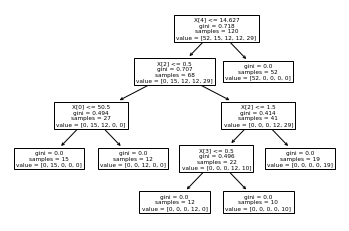

In [ ]:
# Decision Tree's
from sklearn.tree import DecisionTreeClassifier #karar aƒüacƒ± k√ºt√ºphanesi import edildi 
from sklearn import tree
        
Model = DecisionTreeClassifier(max_depth=6) # optimal derinlik verildi 
        
Model.fit(X_train, y_train) #model eƒüitildi 
        
y_pred = Model.predict(X_test)
        
tree.plot_tree(Model)
        
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
        
        # Doƒüruluk skoru
print('doƒüruluk',accuracy_score(y_pred,y_test))




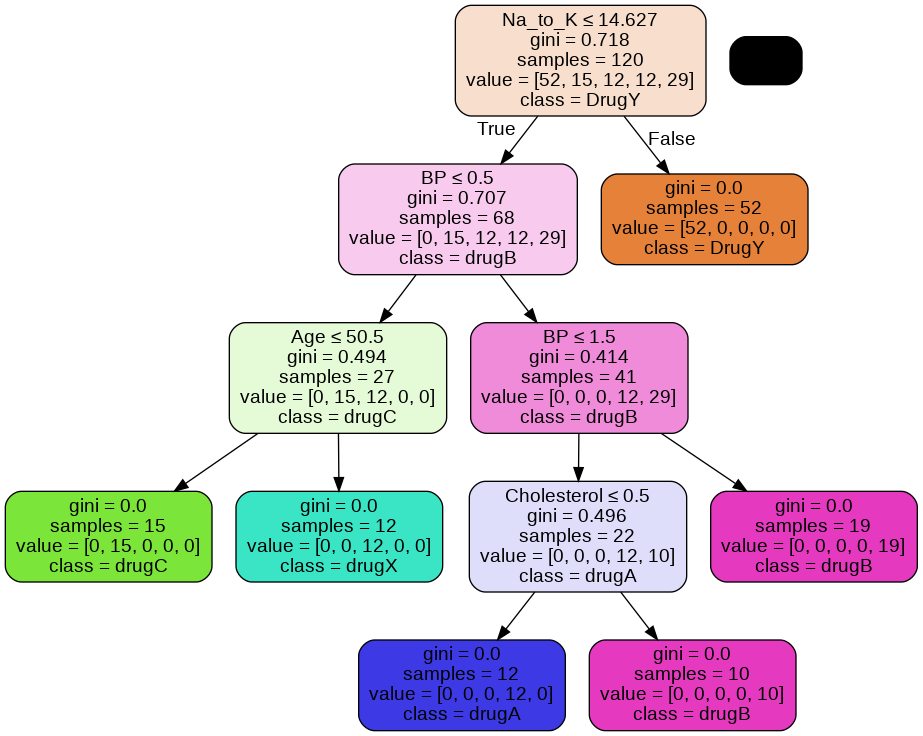

In [ ]:
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(Model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names =['Age', 'gender', 'BP', 'Cholesterol', 'Na_to_K'],class_names=['DrugY', 'drugC', 'drugX', 'drugA', 'drugB'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('Drug.png')
Image(graph.create_png())
#gini deƒüeri derste verilen karar aƒüa√ßlarƒ±nƒ± sunumuna bakmalƒ±sƒ±n 

**karar aƒüacƒ± yorumlanmasƒ±**

yukarƒ±da g√∂rseli verilen graf da k√∂k deƒüerimizi Na_to_K s√ºtunu olu≈üturmaktadƒ±r Na_to_K deƒüerini root(k√∂k) olarak se√ßmemizin nedeni veri k√ºmemizi uygun ko≈üullara g√∂re k√º√ß√ºk alt veri gruplarƒ±na b√∂lme yeteneƒüidir. b√∂lme yeteneƒüini √∂l√ßmemize yarayan hesaplama form√ºllerimiz yer almaktadƒ±r bunlar gini deƒüeri, entropy ve gain ratio  olarak kar≈üƒ±mƒ±za √ßƒ±kmaktadƒ±r entropy ve gini deƒüerlerinin hesaplamalarƒ± birbirine benzerlik g√∂stermektedir.

bu √∂l√ß√ºm deƒüerlerinden en y√ºksek olan root olarak aƒüacƒ± ba≈ülatƒ±r ve derecelerine g√∂re aƒüacƒ±n dallarƒ± ≈üekillenmeye devam eder 



In [ ]:
df_preds=pd.DataFrame({'Gercek': y_test, 'Tahmin':y_pred})
df_preds

Gercek Tahmin
0   drugC  drugC
1   drugX  drugX
2   DrugY  DrugY
3   DrugY  DrugY
4   DrugY  DrugY
..    ...    ...
75  DrugY  DrugY
76  DrugY  DrugY
77  drugX  drugX
78  drugX  drugX
79  DrugY  DrugY

[80 rows x 2 columns]

**Naive Bayes Classifier**

Naive Bayes sƒ±nƒ±flandƒ±rƒ±cƒ±sƒ±nƒ±n temeli Bayes teoremine dayanƒ±r. lazy ( tembel ) bir √∂ƒürenme algoritmasƒ±dƒ±r aynƒ± zamanda dengesiz veri k√ºmelerinde de √ßalƒ±≈üabilir. Algoritmanƒ±n √ßalƒ±≈üma ≈üekli bir eleman i√ßin her durumun olasƒ±lƒ±ƒüƒ±nƒ± hesaplar ve olasƒ±lƒ±k deƒüeri en y√ºksek olana g√∂re sƒ±nƒ±flandƒ±rƒ±r. Az bir eƒüitim verisiyle √ßok ba≈üarƒ±lƒ± i≈üler √ßƒ±kartabilir.

In [ ]:
from sklearn.naive_bayes import GaussianNB
Model = GaussianNB()
Model.fit(X_train, y_train)
            
y_pred = Model.predict(X_test)
            
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
            # Doƒüruluk skoru
print('doƒüruluk',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

       DrugY       0.94      0.87      0.91        39
       drugA       0.80      1.00      0.89         8
       drugB       0.80      1.00      0.89         4
       drugC       0.67      1.00      0.80         4
       drugX       1.00      0.92      0.96        25

    accuracy                           0.91        80
   macro avg       0.84      0.96      0.89        80
weighted avg       0.93      0.91      0.91        80

[[34  2  1  2  0]
 [ 0  8  0  0  0]
 [ 0  0  4  0  0]
 [ 0  0  0  4  0]
 [ 2  0  0  0 23]]
doƒüruluk 0.9125


In [ ]:
df_preds=pd.DataFrame({'Gercek': y_test, 'Tahmin':y_pred})
df_preds

Gercek Tahmin
0   drugC  drugC
1   drugX  drugX
2   DrugY  DrugY
3   DrugY  DrugY
4   DrugY  DrugY
..    ...    ...
75  DrugY  DrugY
76  DrugY  DrugY
77  drugX  drugX
78  drugX  drugX
79  DrugY  DrugY

[80 rows x 2 columns]

**Destek Vekt√∂r Makineleri (Support Vector Machine)**

 genellikle sƒ±nƒ±flandƒ±rma problemlerinde kullanƒ±lan g√∂zetimli √∂ƒürenme y√∂ntemlerinden biridir. Bir d√ºzlem √ºzerine yerle≈ütirilmi≈ü noktalarƒ± ayƒ±rmak i√ßin bir doƒüru √ßizer. Bu doƒürunun, iki sƒ±nƒ±fƒ±nƒ±n noktalarƒ± i√ßin de maksimum uzaklƒ±kta olmasƒ±nƒ± ama√ßlar. Karma≈üƒ±k ama k√º√ß√ºk ve orta √∂l√ßekteki veri setleri i√ßin uygundur.

In [ ]:
# Support Vector Machine
from sklearn.svm import SVC
from sklearn import tree
            
Model=SVC()
Model.fit(X_train, y_train)
        
y_pred = Model.predict(X_test)
            
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
        # Doƒüruluk skoru
        
print('doƒüruluk',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

       DrugY       0.75      1.00      0.86        39
       drugA       0.00      0.00      0.00         8
       drugB       0.00      0.00      0.00         4
       drugC       0.00      0.00      0.00         4
       drugX       0.57      0.64      0.60        25

    accuracy                           0.69        80
   macro avg       0.26      0.33      0.29        80
weighted avg       0.54      0.69      0.61        80

[[39  0  0  0  0]
 [ 0  0  0  0  8]
 [ 3  0  0  0  1]
 [ 1  0  0  0  3]
 [ 9  0  0  0 16]]
doƒüruluk 0.6875


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
%pip install graphviz
%pip install pydotplus
%pip install six

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
df.head()

Age  gender  BP  Cholesterol  Na_to_K   Drug
0   23       0   0            0   25.355  DrugY
1   47       1   1            0   13.093  drugC
2   47       1   1            0   10.114  drugC
3   28       0   2            0    7.798  drugX
4   61       0   1            0   18.043  DrugY

In [ ]:

df.Drug.unique()

array(['DrugY', 'drugC', 'drugX', 'drugA', 'drugB'], dtype=object)

In [ ]:
df_preds=pd.DataFrame({'Gercek': y_test, 'Tahmin':y_pred})
df_preds

Gercek Tahmin
0   drugC  drugX
1   drugX  drugX
2   DrugY  DrugY
3   DrugY  DrugY
4   DrugY  DrugY
..    ...    ...
75  DrugY  DrugY
76  DrugY  DrugY
77  drugX  drugX
78  drugX  drugX
79  DrugY  DrugY

[80 rows x 2 columns]

In [ ]:


def get_models():
    models=[]
    
    models.append(("NB",GaussianNB()))
    models.append(("KNN",KNeighborsClassifier()))
    models.append(("DT",DecisionTreeClassifier()))
    models.append(("SVM rbf",SVC()))
    
    
    
    return models

def cross_validation_scores_for_various_ml_models(X_cv, y_cv):
    print("√áapraz Doƒürulama Ba≈üarƒ± Oranlarƒ±".upper())
    models=get_models()


    results=[]
    names= []

    for name, model in models:
        kfold=StratifiedKFold(n_splits=5,shuffle=True,random_state=22)
        cv_result=cross_val_score(model,X_cv, y_cv, cv=kfold,scoring="accuracy")
        names.append(name)
        results.append(cv_result)
        print("{} modelinin √ßapraz doƒürulamasƒ± yapƒ±ldƒ±, ba≈üarƒ± oranƒ±:{:0.2f}".format(name, cv_result.mean()))

   

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
dataset_temp=df.copy(deep=True)
X=df.drop('Drug', axis=1)
y=df['Drug']

X=StandardScaler().fit_transform(X)
cross_validation_scores_for_various_ml_models(X, y)


√áAPRAZ DOƒûRULAMA BA≈ûARI ORANLARI
NB modelinin √ßapraz doƒürulamasƒ± yapƒ±ldƒ±, ba≈üarƒ± oranƒ±:0.83
KNN modelinin √ßapraz doƒürulamasƒ± yapƒ±ldƒ±, ba≈üarƒ± oranƒ±:0.80
DT modelinin √ßapraz doƒürulamasƒ± yapƒ±ldƒ±, ba≈üarƒ± oranƒ±:0.99
SVM rbf modelinin √ßapraz doƒürulamasƒ± yapƒ±ldƒ±, ba≈üarƒ± oranƒ±:0.95
